<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_07_LA_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src = 'https://rroundtable.github.io/blog/images/2020-11-27-singular-value-decomposition/matrix.png'>

### **[해석](https://rroundtable.github.io/blog/math/linear%20algebra/2020/11/17/singular-value-decomposition.html)**




# **Singular Value Decomposition (SVD) 설명**

- 영화 평가 데이터 행렬을 SVD로 분해한 결과
- SVD는 원본 행렬을 세 개의 행렬로 분해하여 데이터의 잠재적인 구조를 발견하는 방법

## **1. 원본 행렬 $A$**
> 원본 행렬 $A$는 사용자들이 영화에 매긴 평가 점수 :
\begin{bmatrix}
5 & 4 & 1 \\
5 & 5 & 0 \\
0 & 0 & 5 \\
1 & 0 & 4
\end{bmatrix}

 - 이 행렬에서 각 행은 영화(예: Star Wars, Blade Runner 등)를, 각 열은 사용자(Ali, Beatrix, Chandra)의 평점을 표현
 - 예를 들어, $A_{1,1} = 5$는 사용자 Ali가 Star Wars에 대해 5점을 매겼다는 것을 의미

## **2. SVD의 세 행렬 $U$, $\Sigma$, $V^T$**
> 행렬 $A$는 다음과 같이 세 개의 행렬 $U$, $\Sigma$, $V^T$로 분해

>> ## **$A$ = $U$ $\Sigma$ $V^T$**


### **2.1. 행렬 $U$**
>> $U$는 영화와 관련된 잠재적 특징을 나타내며, 각 행은 하나의 영화에 해당하며, 각 열은 잠재적 요인을 나타냄

\begin{bmatrix}
-0.6710 & 0.0236 & 0.4647 & -0.5774 \\
-0.7197 & 0.2054 & -0.4759 & 0.4619 \\
-0.0939 & -0.7705 & -0.5268 & -0.3464 \\
-0.1515 & -0.6030 & 0.5293 & -0.5774
\end{bmatrix}

>> - Star Wars와 Blade Runner는 첫 번째 잠재적 특징에서 강한 음수 연관을 가지고 있어, SF 또는 액션과 같은 특정 장르에 더 부합할 가능성이 높고,
>> - Amelie와 Delicatessen은 두 번째 및 세 번째 특징에 대한 영향이 크므로 좀 더 예술적이거나 독특한 성격을 가진 영화일 것임

>> 행렬 $U$의 각 요소는 각 영화가 잠재적 특징에 얼마나 연관되는지를 나타냅니다.

### **2.2 대각 행렬 $\Sigma$**
>> $\Sigma$는 특잇값(Singular Values)을 포함하는 대각 행렬은 원본 행렬의 중요도

\begin{bmatrix}
9.6438 & 0 & 0 \\
0 & 6.3639 & 0 \\
0 & 0 & 0.7056 \\
0 & 0 & 0
\end{bmatrix}

>> 대각 성분이 클수록 데이터의 주요 변동을 설명하는 데 중요한 요소임을 의미하며, 첫 번째 특잇값(9.6438)은 가장 큰 정보를 가짐

### **2.3. 행렬 $V^T$**
>> $V^T$는 사용자와 관련된 잠재적 특징을 나타내며 각 열은 사용자(Ali, Beatrix, Chandra)에 해당하며, 각 행은 잠재적 요인을 나타냄


\begin{bmatrix}
-0.7367 & -0.6515 & -0.1811 \\
0.0852 & 0.1762 & -0.9807 \\
0.6708 & -0.7379 & -0.0743
\end{bmatrix}

>> 이 행렬의 각 요소는 각 사용자의 취향이 잠재적 특징과 얼마나 연관되어 있는지를 보여줌

>>> - **Ali**: 첫 번째 잠재적 특징에 대해 강한 부정적 연관을 보이며, 이는 SF나 액션보다는 예술적이거나 독특한 영화를 선호하지 않을 가능성이 높음

>>> - **Beatrix**: 첫 번째와 두 번째 특징에 대해서 모두 부정적 연관이 있어 특정 장르에 대한 선호가 적거나 다양한 장르를 폭넓게 수용하지 않는 성향

>>> - **Chandra**: 두 번째 특징에 대해 강한 부정적 연관성을 보이며, 이는 예술적이고 감성적인 영화를 선호하지 않는다는 것을 나타냄

## **3. 전체적인 해석**
- SVD를 통해 원래의 영화-사용자 평가 행렬 $A$를 세 개의 행렬로 분해함으로써, 각 영화와 사용자가 공유하는 잠재적 특징을 파악할 수 있으며 이러한 특징은 추천 시스템에서 사용되며, 사용자가 평가하지 않은 영화를 추천하는 데 유용

- 이러한 방식으로 데이터를 분해하면, 데이터의 잠재적인 패턴을 찾고 분석하는 데 큰 도움을 줄 수 있음


In [ ]:
import numpy as np

A = np.array([
    [5, 4, 1],
    [5, 5, 0],
    [0, 0, 5],
    [1, 0, 4]
])

A

array([[5, 4, 1],
       [5, 5, 0],
       [0, 0, 5],
       [1, 0, 4]])

In [ ]:
# prompt: A를 SVD 하려면

from numpy.linalg import svd
U, S, VT = svd(A)

print("U matrix:\n", U)
print("\nS matrix:\n", S)
print("\nVT matrix:\n", VT)

U matrix:
 [[-0.67096878  0.02362898 -0.46466034 -0.57735027]
 [-0.7197425   0.20541998  0.47585716  0.46188022]
 [-0.09389374 -0.77048084  0.52682373 -0.34641016]
 [-0.15151103 -0.6029955  -0.52925183  0.57735027]]

S matrix:
 [9.6438109  6.36389089 0.70555232]

VT matrix:
 [[-0.73674894 -0.65146317 -0.1810987 ]
 [ 0.0852072   0.17624687 -0.9806512 ]
 [-0.67077622  0.73792464  0.07434034]]


In [ ]:
# prompt: VT matrix를 해석하면

import numpy as np
from numpy.linalg import svd

# ... (Previous code remains the same)

print("\nVT matrix 해석:")
print("VT 행렬은 사용자와 관련된 잠재적 특징을 나타냅니다.")
print("각 열은 사용자(Ali, Beatrix, Chandra)에 해당하며, 각 행은 잠재적 요인을 나타냅니다.")
print("행렬의 각 요소는 각 사용자의 취향이 잠재적 특징과 얼마나 연관되어 있는지를 보여줍니다.")

print("\n예시:")
print("- Ali: 첫 번째 잠재적 특징에 대해 강한 부정적 연관을 보이며, 이는 SF나 액션보다는 예술적이거나 독특한 영화를 선호하지 않을 가능성이 높음")
print("- Beatrix: 첫 번째와 두 번째 특징에 대해서 모두 부정적 연관이 있어 특정 장르에 대한 선호가 적거나 다양한 장르를 폭넓게 수용하지 않는 성향")
print("- Chandra: 두 번째 특징에 대해 강한 부정적 연관성을 보이며, 이는 예술적이고 감성적인 영화를 선호하지 않는다는 것을 나타냄")

# VT 행렬의 각 요소에 대한 추가적인 분석이나 시각화를 통해 사용자의 취향에 대한 더 자세한 정보를 얻을 수 있습니다.


VT matrix 해석:
VT 행렬은 사용자와 관련된 잠재적 특징을 나타냅니다.
각 열은 사용자(Ali, Beatrix, Chandra)에 해당하며, 각 행은 잠재적 요인을 나타냅니다.
행렬의 각 요소는 각 사용자의 취향이 잠재적 특징과 얼마나 연관되어 있는지를 보여줍니다.

예시:
- Ali: 첫 번째 잠재적 특징에 대해 강한 부정적 연관을 보이며, 이는 SF나 액션보다는 예술적이거나 독특한 영화를 선호하지 않을 가능성이 높음
- Beatrix: 첫 번째와 두 번째 특징에 대해서 모두 부정적 연관이 있어 특정 장르에 대한 선호가 적거나 다양한 장르를 폭넓게 수용하지 않는 성향
- Chandra: 두 번째 특징에 대해 강한 부정적 연관성을 보이며, 이는 예술적이고 감성적인 영화를 선호하지 않는다는 것을 나타냄


In [ ]:
# prompt: 제대로된 A데이터를 생성하여 SVD가 해석가능한 것을 제시해다오

import numpy as np
from numpy.linalg import svd

# Create a more interpretable matrix A
# Rows represent movies, columns represent users.
# Each cell represents the rating of a movie by a user.
A = np.array([
    [5, 3, 1, 2],  # Action movie (User 1 likes action)
    [4, 5, 2, 1],  # Action movie
    [1, 2, 4, 5],  # Comedy movie (Users 3 & 4 like comedy)
    [2, 1, 5, 4]   # Comedy movie
])


U, S, VT = svd(A)

print("U matrix:\n", U)
print("\nS matrix:\n", S)
print("\nVT matrix:\n", VT)


print("\nMatrix A (reconstructed):\n", np.dot(U[:,:2] * S[:2], VT[:2,:])) #Reconstructed matrix using first two components

print("\nVT matrix 해석:")
print("VT 행렬은 사용자와 관련된 잠재적 특징을 나타냅니다.")
# Add detailed interpretations based on the new matrix A
print("첫 번째 열은 액션 영화에 대한 선호도를, 두 번째 열은 코미디 영화에 대한 선호도를 나타낼 수 있습니다.")

print("\n예시:")
print("- User 1: 높은 액션 영화 선호도")
print("- User 2: 중간 액션 영화 선호도")
print("- User 3: 높은 코미디 영화 선호도")
print("- User 4: 중간 코미디 영화 선호도")

U matrix:
 [[-0.46125171  0.48144693 -0.7018928  -0.25060369]
 [-0.49763878  0.5549658   0.63202816  0.21191747]
 [-0.5177318  -0.48736116  0.24169454 -0.66031556]
 [-0.52111063 -0.47191198 -0.22241998  0.67547919]]

S matrix:
 [11.76911242  5.75875616  1.87412025  1.34625167]

VT matrix:
 [[-0.49763878 -0.46125171 -0.52111063 -0.5177318 ]
 [ 0.5549658   0.48144693 -0.47191198 -0.48736116]
 [-0.63202816  0.7018928   0.22241998 -0.24169454]
 [ 0.21191747 -0.25060369  0.67547919 -0.66031556]]

Matrix A (reconstructed):
 [[4.24010603 3.83874433 1.52046848 1.459293  ]
 [4.68817648 4.24010603 1.54383392 1.47467064]
 [1.47467064 1.459293   4.49971946 4.52249096]
 [1.54383392 1.52046848 4.47845681 4.49971946]]

VT matrix 해석:
VT 행렬은 사용자와 관련된 잠재적 특징을 나타냅니다.
첫 번째 열은 액션 영화에 대한 선호도를, 두 번째 열은 코미디 영화에 대한 선호도를 나타낼 수 있습니다.

예시:
- User 1: 높은 액션 영화 선호도
- User 2: 중간 액션 영화 선호도
- User 3: 높은 코미디 영화 선호도
- User 4: 중간 코미디 영화 선호도


## **1. Eigenvector, Eigenvalue와 주성분분석의 관계**

In [ ]:
import numpy as np

# 주어진 행렬 A
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [ ]:
# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(A)

# 결과 출력
print("Eigenvalues:")
print(eigenvalues, eigenvalues.shape)
print("\nEigenvectors:")
print(eigenvectors, eigenvectors.shape)

Eigenvalues:
[3. 1.] (2,)

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] (2, 2)


$ \mathbf{A}\mathbf{v} = \mathbf{w} $

or

$$
\begin{bmatrix}
A_{11} & A_{12} & \cdots & A_{1n} \\
A_{21} & A_{22} & \cdots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{n1} & A_{n2} & \cdots & A_{nn}
\end{bmatrix}
\cdot
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}
=
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

where, for each row,

$$
w_i = A_{i1}v_1 + A_{i2}v_2 + \cdots + A_{in}v_n = \sum_{j=1}^{n} A_{ij} v_j
$$

If it occurs that $ \mathbf{v} $ and $ \mathbf{w} $ are scalar multiples, that is if
## **Eigenvalues and eigenvectors of matrices**
$$
\begin{bmatrix}
\lambda & 0 & \cdots & 0 \\
0 & \lambda & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}
=
\begin{bmatrix}
\lambda v_1 \\
\lambda v_2 \\
\vdots \\
\lambda v_n
\end{bmatrix}
$$






### **주성분분석의 총변동량 설명비율은 Eigenvalue, 주성분벡터는 Eigenvector**

In [ ]:
# 첫 번째 고유값과 고유벡터에 대해 A * v = lambda * v 확인
lambda_1 = eigenvalues[0]
v_1 = eigenvectors[:, 0]
Av_1 = np.dot(A, v_1)
lambda_v_1 = lambda_1 * v_1

print(f'lambda_1(총분산 설명력) : {lambda_1}')
print(f'v_1(주성분 1)" {v_1}')

print("\nA * v_1:")
print(Av_1)
print("lambda_1 * v_1:")
print(lambda_v_1)
print('*'*100)

# 두 번째 고유값과 고유벡터에 대해 A * v = lambda * v 확인
lambda_2 = eigenvalues[1]
v_2 = eigenvectors[:, 1]
Av_2 = np.dot(A, v_2)
lambda_v_2 = lambda_2 * v_2

print(f'lambda_2(총분산 설명력) : {lambda_2}')
print(f'v_1(주성분 2)" {v_2}')
print("\nA * v_2:")
print(Av_2)
print("lambda_2 * v_2:")
print(lambda_v_2)

lambda_1(총분산 설명력) : 3.0
v_1(주성분 1)" [0.70710678 0.70710678]

A * v_1:
[2.12132034 2.12132034]
lambda_1 * v_1:
[2.12132034 2.12132034]
****************************************************************************************************
lambda_2(총분산 설명력) : 1.0
v_1(주성분 2)" [-0.70710678  0.70710678]

A * v_2:
[-0.70710678  0.70710678]
lambda_2 * v_2:
[-0.70710678  0.70710678]


In [ ]:
# 고유값을 대각행렬로 변환
diag_matrix = np.diag(eigenvalues)
print("대각 행렬:")
print(diag_matrix)

# A와 고유벡터 행렬의 곱과 고유벡터 행렬과 고유값 대각행렬의 곱 비교
print("\nA @ eigenvectors:")
print(A @ eigenvectors)
print("\nEigenvectors @ diag_matrix:")
print(eigenvectors @ diag_matrix)

대각 행렬:
[[3. 0.]
 [0. 1.]]

A @ eigenvectors:
[[ 2.12132034 -0.70710678]
 [ 2.12132034  0.70710678]]

Eigenvectors @ diag_matrix:
[[ 2.12132034 -0.70710678]
 [ 2.12132034  0.70710678]]


In [ ]:
# SVD 계산
U, S, Vt = np.linalg.svd(A)

# SVD 결과 출력
print("\nU matrix:")
print(U)
print("\nSingular values:")
print(S)
print("\nV^T matrix:")
print(Vt)

# SVD를 사용하여 A 재구성
A_reconstructed = np.dot(U, np.dot(np.diag(S), Vt))
print("\nReconstructed A using SVD:")
print(A_reconstructed)


U matrix:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Singular values:
[3. 1.]

V^T matrix:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Reconstructed A using SVD:
[[2. 1.]
 [1. 2.]]


### **[In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) -- Datascience Handbook**

### **주성분분석(PCA)와 특이값 분해(SVD, Singular Value Decompositio) 비교**
- PCA와 SVD는두 기법 모두 차원 축소에 효과적
- PCA는 데이터를 최대 분산 방향으로 정렬하는 반면, SVD는 행렬을 분해하여 데이터의 근본적인 구조를 이해하는 데 사용

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 샘플 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 3)  # 10개의 샘플, 3개의 특징

# PCA를 사용하여 주성분을 계산
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("PCA 변환 결과:")
print(X_pca[:5])

# SVD를 사용하여 동일한 결과 도출
X_meaned = X - np.mean(X, axis=0)  # 평균을 제거하여 중심화
U, S, Vt = np.linalg.svd(X_meaned, full_matrices=False)

# 첫 두 개의 주성분과 같은 결과를 얻기 위해 U와 S를 사용
X_svd = U[:, :2] @ np.diag(S[:2])

print("\nSVD 변환 결과:")
print(X_svd[:5])

# 결과 비교
print("\nPCA와 SVD의 결과 비교:")
print("PCA 변환 결과와 SVD 변환 결과가 유사한지 확인:")
print(np.allclose(X_pca, X_svd))


PCA 변환 결과:
[[ 0.29763492  0.41121432]
 [-0.19104597 -0.46292123]
 [ 0.1394212   0.45452287]
 [-0.47562397  0.00764032]
 [-0.06202359 -0.54866692]]

SVD 변환 결과:
[[-0.29763492 -0.41121432]
 [ 0.19104597  0.46292123]
 [-0.1394212  -0.45452287]
 [ 0.47562397 -0.00764032]
 [ 0.06202359  0.54866692]]

PCA와 SVD의 결과 비교:
PCA 변환 결과와 SVD 변환 결과가 유사한지 확인:
False


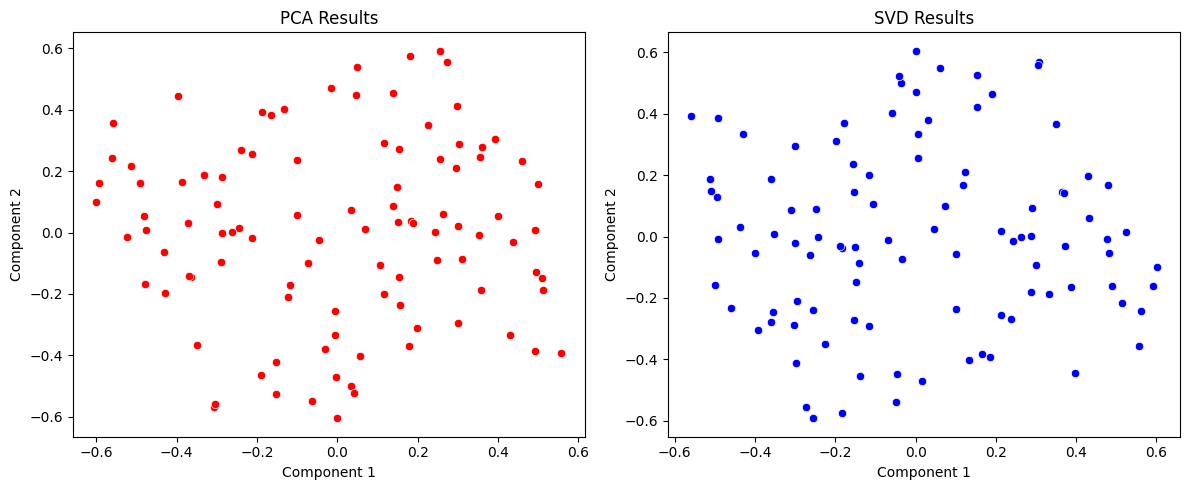

In [ ]:
import seaborn as sns
# 시각화 (첫 두 개의 주성분만 사용, Seaborn을 이용하여 한 줄에 두 개의 그림 그리기)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PCA 결과 시각화
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], color='red', ax=axes[0])
axes[0].set_title('PCA Results')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

# SVD 결과 시각화
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], color='blue', ax=axes[1])
axes[1].set_title('SVD Results')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

## **Eigenvalue(Spectral) Decomposition**
### **특이값분해 - SVD(Singular Value Decomposition)**

<img src='https://blog.kakaocdn.net/dn/owaEE/btrB2Yfh5bH/2n8nz2vR920GFjkKUYgEo1/img.png'>

<img src= 'https://miro.medium.com/v2/resize:fit:828/format:webp/1*6CSyGtpxIIK1U94hW9IXqA.png'>
<IMG SRC = 'https://mblogthumb-phinf.pstatic.net/MjAyMTAxMDlfNjUg/MDAxNjEwMTU0NzYzMDg5.qFccrWDMkYqLBJMqnFADDGSPNLON-2QOETxDN-VQJwUg.zRDUw9MgmDDa1YhBNtERZJzsygWJaA5UIWDJvrnavTYg.PNG.kiakass/image.png?type=w800'>


In [ ]:
import numpy as np

# 5x3 행렬 A 생성
A = np.random.rand(5, 3)
print(A)

# SVD 수행
U, S, Vt = np.linalg.svd(A)

# 결과 출력
print("U matrix:")
print(U)
print("\nSingular values:")
print(S)
print("\nV^T matrix:")
print(Vt)

# SVD를 사용하여 A 재구성
# S를 5x3 크기의 대각 행렬로 변환
S_full = np.zeros((U.shape[0], Vt.shape[0]))
S_full[:S.shape[0], :S.shape[0]] = np.diag(S)
# S의 대각 요소들을 S_full의 대각 요소들로 채움

A_reconstructed = np.dot(U, np.dot(S_full, Vt)) # S_full을 이용하여 A를 재구성
print("\nReconstructed A using SVD:")
print(A_reconstructed)

[[0.01822569 0.17906518 0.41403136]
 [0.04494144 0.22879888 0.20647333]
 [0.67907113 0.63808182 0.77069217]
 [0.33693113 0.34921983 0.28875504]
 [0.80165718 0.81069825 0.61165899]]
U matrix:
[[-0.18592338  0.81798417  0.07984648 -0.22451432 -0.48944075]
 [-0.14661994  0.28677023  0.73361881  0.19054331  0.56724079]
 [-0.63301356  0.21246209 -0.5847327   0.12166105  0.44434215]
 [-0.2959067  -0.11601818  0.11370359  0.83014614 -0.44374304]
 [-0.67503196 -0.43596372  0.31715477 -0.45753965 -0.21056545]]

Singular values:
[1.90286437 0.34261182 0.13290702]

V^T matrix:
[[-0.56792462 -0.589289   -0.57463041]
 [-0.6319412  -0.13513102  0.76314476]
 [-0.52736321  0.79654133 -0.29565176]]

Reconstructed A using SVD:
[[0.01822569 0.17906518 0.41403136]
 [0.04494144 0.22879888 0.20647333]
 [0.67907113 0.63808182 0.77069217]
 [0.33693113 0.34921983 0.28875504]
 [0.80165718 0.81069825 0.61165899]]


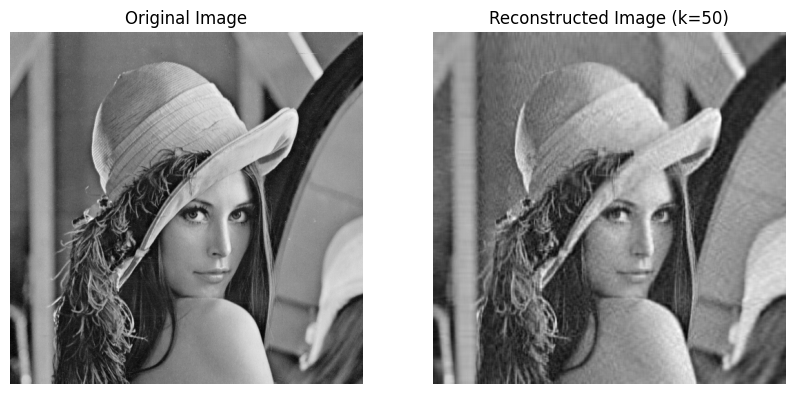

In [ ]:
# 이미지 데이터로 SVD 시각화
# 이미지 불러오기
import urllib
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 불러오기
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
img = np.array(Image.open(urllib.request.urlopen(url)))

# 이미지 변환 (회색조로 변경)
img_gray = np.mean(img, axis=2)

# SVD 분해
U_img, S_img, Vt_img = np.linalg.svd(img_gray, full_matrices=False)

# Singular 값의 일부만 사용하여 이미지 재구성
k = 50
img_reconstructed = np.dot(U_img[:, :k], np.dot(np.diag(S_img[:k]), Vt_img[:k, :]))

# 원본 이미지와 SVD 재구성 이미지 시각화
plt.figure(figsize=(10, 5))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# SVD 재구성 이미지
plt.subplot(1, 2, 2)
plt.title(f"Reconstructed Image (k={k})")
plt.imshow(img_reconstructed, cmap='gray')
plt.axis('off')

plt.show()

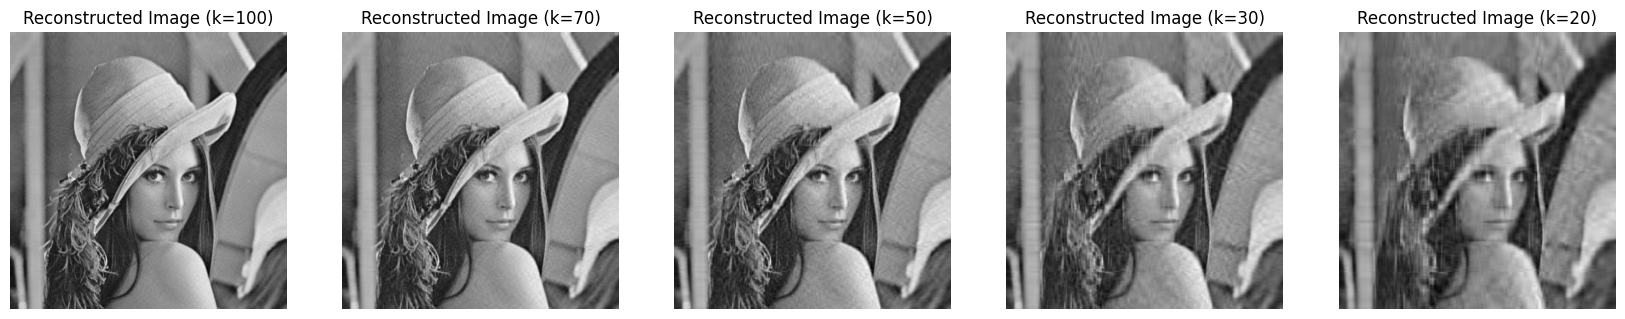

In [ ]:
# prompt: k=50, 30, 20일 경우 시각화

# 이미지 데이터로 SVD 시각화
# 이미지 불러오기

# 이미지 불러오기
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
img = np.array(Image.open(urllib.request.urlopen(url)))

# 이미지 변환 (회색조로 변경)
img_gray = np.mean(img, axis=2)

# SVD 분해
U_img, S_img, Vt_img = np.linalg.svd(img_gray, full_matrices=False)

# Singular 값의 일부만 사용하여 이미지 재구성
k_values = [100, 70 , 50, 30, 20]
plt.figure(figsize=(25, 5))

for i, k in enumerate(k_values):
  img_reconstructed = np.dot(U_img[:, :k], np.dot(np.diag(S_img[:k]), Vt_img[:k, :]))

  # 원본 이미지와 SVD 재구성 이미지 시각화
  plt.subplot(1, 6, i+1)
  plt.title(f"Reconstructed Image (k={k})")
  plt.imshow(img_reconstructed, cmap='gray')
  plt.axis('off')

plt.show()